In [19]:
file_path = 'stock_data_for_emm.pkl'

In [20]:
import pickle

with open(file_path, 'rb') as f:
    stock_data = pickle.load(f)

import pandas as pd

stock_data = pd.DataFrame(stock_data)

/var/folders/76/dl3rv17s7xz76wgx74llyccm0000gn/T/ipykernel_13413/1450738717.py:4: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  stock_data = pickle.load(f)


In [21]:
stock_data.shape

(18504, 12)

In [22]:
stock_data.head()

,country,industry,currency,exchangeTimezoneName,exchange,sector,averageVolume10days,enterpriseToEbitda,marketCap,debtToEquity,fullTimeEmployees,target
SOG.PA,France,Aerospace & Defense,EUR,Europe/Paris,PAR,Industrials,382.0,11.822,5.750674e+07,50.783,1102.0,"[47.20000076293945, 47.75, 48.900001525878906,..."
ORO.F,Canada,Drug Manufacturers—Specialty & Generic,EUR,Europe/Berlin,FRA,Healthcare,0.0,-6.054,2.624033e+05,NaN,40.0,"[0.11999999731779099, 0.3190000057220459, 0.58..."
AOF.DE,Germany,Software—Application,EUR,Europe/Berlin,GER,Technology,8329.0,33.294,1.241838e+09,32.492,650.0,"[37.70000076293945, 37.005001068115234, 43.299..."
O5H.F,Switzerland,Software—Application,EUR,Europe/Berlin,FRA,Technology,7650.0,-0.387,1.976241e+05,NaN,52.0,"[0.3199999928474426, 0.26499998569488525, 0.30..."
EUK2.HA,Germany,Marine Shipping,EUR,Europe/Berlin,HAN,Industrials,0.0,7.614,NaN,41.392,807.0,"[42.5, 44.5, 43.599998474121094, 47.0, 46.0, 4..."


In [23]:
# split the index into two columns
stock_data['ticker'] = stock_data.index.str.split('.').str[0]
stock_data['exchange_ticker'] = stock_data.index.str.split('.').str[1]

In [24]:
stock_data['target'].head()

SOG.PA     [47.20000076293945, 47.75, 48.900001525878906,...
ORO.F      [0.11999999731779099, 0.3190000057220459, 0.58...
AOF.DE     [37.70000076293945, 37.005001068115234, 43.299...
O5H.F      [0.3199999928474426, 0.26499998569488525, 0.30...
EUK2.HA    [42.5, 44.5, 43.599998474121094, 47.0, 46.0, 4...
Name: target, dtype: object

In [25]:
# get the first value of the target column
ts = stock_data['target'].iloc[0]

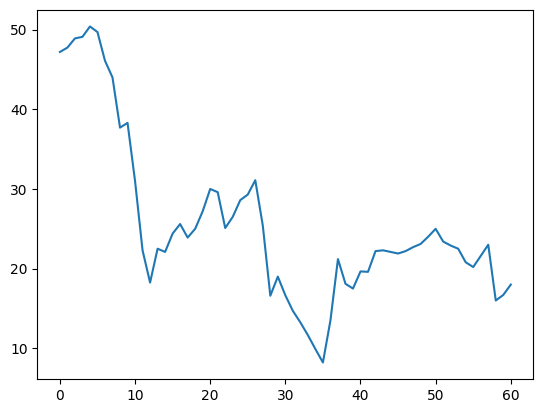

In [26]:
# plot the time series
import matplotlib.pyplot as plt

plt.plot(ts)
plt.show()

In [27]:
# check if all S&P 500 companies are present
sp500 = pd.read_csv('sp500.csv')
sp500.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [28]:
present = []
not_present = []

for ticker in sp500['Symbol']:
    if ticker in stock_data['ticker'].unique():
        present.append(ticker)
    else:
        not_present.append(ticker)

print('Present:', len(present))
print('Not present:', len(not_present))

Present: 448
Not present: 55


In [29]:
import yfinance as yf

In [30]:
ticker = 'AAPL'

info = yf.Ticker(ticker).info

In [31]:
info_to_keep = ['country', 'industry', 'sector', 'fullTimeEmployees', 'auditRisk', 'boardRisk', 'compensationRisk', 'overallRisk', 'dividentRate', 'dividentYield', 'marketCap', 'profitMargins', 'totalCash', 'totalCashPerShare', 'ebitda', 'totalDebt', 'totalRevenue', 'revenuePerShare', 'grossMargins']

In [32]:
def get_info(ticker, info_to_keep):
    info = yf.Ticker(ticker).info
    return {key: info[key] for key in info_to_keep}

In [34]:

def read_s_and_p(file='sp500.csv'):
	""" read in s&p data """
	data = pd.read_csv(file)
	return data['Symbol'].values.tolist()